In [68]:
import pandas as pd
import matplotlib as plt
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# 다변량
def split_mult_data(data, timestep, lag):
    x, y = [], []
    for i in range(len(data)):
        end_ix = i + timestep
        out_end_ix = end_ix + lag
        if out_end_ix > len(data):
            break;
        seq_x, seq_y = data[i:end_ix, :], data[end_ix:out_end_ix, 0]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)

# 단일
def split_data(data, timestep):
    x, y = [], []
    for i in range(len(data)):
        end_ix = i + timestep
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)

# 데이터 분할 함수 : 6.2.2
def split(data_x, data_y):
    train_size = int(len(data_x)*0.6)
    val_size = int(len(data_x)*0.8)
    
    data_train_x = data_x[:train_size]
    data_val_x = data_x[train_size:val_size]
    data_test_x = data_x[val_size:]
    
    data_train_y = data_y[:train_size]
    data_val_y = data_y[train_size:val_size]
    data_test_y = data_y[val_size:] 
    
    return data_train_x, data_val_x, data_test_x, data_train_y, data_val_y, data_test_y

def normalization(data_train, data_val, data_test):
    scaler = MinMaxScaler() #StandardScaler
    scaler.fit(data_train)
    n_data_train = scaler.transform(data_train)
    n_data_val = scaler.transform(data_val)
    n_data_test = scaler.transform(data_test)
    return n_data_train, n_data_val, n_data_test

# 뉴스 데이터

In [28]:
# 사회적 거리두기 
new_covid19 = pd.read_csv("NewsResult_20200120-20210325.csv")
new_covid19 = new_covid19[{'일자', '제목'}]

new_covid19_plot = new_covid19
new_covid19

,일자,제목
0,20210325,"""영국, 백신 접종 증빙시 술집 출입시 사회적 거리두기 완화 검토"""
1,20210322,"[코로나19] 정부, 사회적 거리두기 조정안 26일 발표 내주 적용"
2,20210322,"정부, 사회적 거리두기 조정안 26일 발표 내주 적용 [종합]"
3,20210322,정부 “다음주 적용 ‘사회적 거리두기’ 조정안 26일 결정”
4,20210322,"'사회적 거리두기' 조정안 26일 결정 ""지속적인 정체 상황"""
...,...,...
4227,20200229,"코로나19 확진자 41.7% 감염원 '불분명' 방역당국 ""사회적 거리두기 필요"""
4228,20200229,주말 외출 NO 집회 NO ‘사회적 거리두기’ 동참하세요 [코로나 이겨내자]
4229,20200228,온 국민 ‘사회적 거리두기’ 코로나 고비 넘자
4230,20200227,[오늘의시선] ‘사회적 거리두기’ 절실한 이유


In [23]:
date = new_covid19['일자'].astype('str')
date= pd.to_datetime(date, format='%Y-%m-%d')
date

0      2021-03-25
1      2021-03-22
2      2021-03-22
3      2021-03-22
4      2021-03-22
          ...    
4227   2020-02-29
4228   2020-02-29
4229   2020-02-28
4230   2020-02-27
4231   2020-02-25
Name: 일자, Length: 4232, dtype: datetime64[ns]

In [24]:
new_covid19['일자'] = date
new_covid19

,일자,제목
0,2021-03-25,"""영국, 백신 접종 증빙시 술집 출입시 사회적 거리두기 완화 검토"""
1,2021-03-22,"[코로나19] 정부, 사회적 거리두기 조정안 26일 발표 내주 적용"
2,2021-03-22,"정부, 사회적 거리두기 조정안 26일 발표 내주 적용 [종합]"
3,2021-03-22,정부 “다음주 적용 ‘사회적 거리두기’ 조정안 26일 결정”
4,2021-03-22,"'사회적 거리두기' 조정안 26일 결정 ""지속적인 정체 상황"""
...,...,...
4227,2020-02-29,"코로나19 확진자 41.7% 감염원 '불분명' 방역당국 ""사회적 거리두기 필요"""
4228,2020-02-29,주말 외출 NO 집회 NO ‘사회적 거리두기’ 동참하세요 [코로나 이겨내자]
4229,2020-02-28,온 국민 ‘사회적 거리두기’ 코로나 고비 넘자
4230,2020-02-27,[오늘의시선] ‘사회적 거리두기’ 절실한 이유


In [25]:
new_covid19 = new_covid19.groupby(by=['일자'], as_index=False).count()
new_covid19

,일자,제목
0,2020-02-25,1
1,2020-02-27,1
2,2020-02-28,1
3,2020-02-29,4
4,2020-03-02,13
...,...,...
345,2021-03-17,1
346,2021-03-19,2
347,2021-03-21,1
348,2021-03-22,5


In [6]:
from datetime import date
from datetime import timedelta

# 날짜 2020-01-20 ~ 2021-03-25
start = date(2020, 1, 20)
end = date(2021, 3, 25)

print(end- start)

index = []
for i in range (0,431) :
    date = start + timedelta(i)
    index.append(date)

print(index[-1])

430 days, 0:00:00
2021-03-25


In [7]:
news = pd.DataFrame({'날짜' : index, '뉴스 수' : 0})
news

,날짜,뉴스 수
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0
...,...,...
426,2021-03-21,0
427,2021-03-22,0
428,2021-03-23,0
429,2021-03-24,0


# 날짜를 맞춰준다 
- 중간중간 뉴스가 없는 날이 있기 떄문에

In [8]:
for i in range(len(news)):
    for j in range(len(new_covid19)):
        if news['날짜'][i] == new_covid19['일자'][j]:
            news['뉴스 수'][i] =  new_covid19['제목'][j]
            
news

C:\Users\PC\anaconda3\envs\lab\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,날짜,뉴스 수
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0
...,...,...
426,2021-03-21,1
427,2021-03-22,5
428,2021-03-23,0
429,2021-03-24,0


# 검색어 데이터

In [9]:
# 코로나 관련 검색어
search_covid19 = pd.read_csv("datalab.csv")
search_covid19

,날짜,코로나
0,2020-01-20,0.02489
1,2020-01-21,0.04787
2,2020-01-22,0.07532
3,2020-01-23,0.32646
4,2020-01-24,0.51525
...,...,...
426,2021-03-21,3.49346
427,2021-03-22,4.47571
428,2021-03-23,4.12057
429,2021-03-24,4.28381


# 코로나 데이터

In [10]:
covid19 = pd.read_csv("covid19.csv",  header=0, index_col='date', squeeze=True)
covid19 = covid19[{'decide_per_day', 'recovered_per_day', 'death_per_day'}]

covid19

,decide_per_day,death_per_day,recovered_per_day
date,,,
2020-01-20,1,0,0
2020-01-21,0,0,0
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,1,0,0
...,...,...,...
2021-03-21,410,1,283
2021-03-22,346,7,468
2021-03-23,425,3,481


In [122]:
covid19['decide_per_day'].std()

267.0399919042277

# 총 데이터 시각화

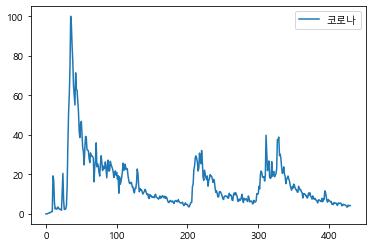

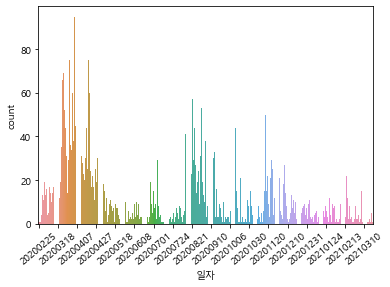

<AxesSubplot:xlabel='date'>

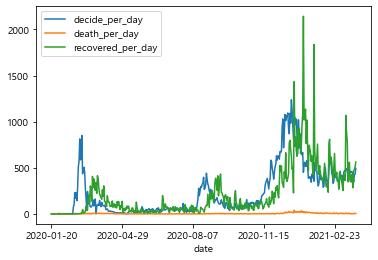

In [30]:
search_covid19.plot()

plt.figure()
ax = sns.countplot(x='일자', data=new_covid19_plot)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40)
plt.xticks(np.arange(0,350,20))
plt.show()

covid19.plot()

# 데이터 형태에 변경 Timestep : 1, lag : 1
- 뉴스 데이터

In [356]:
news_data = news['뉴스 수'].values

timestep = 1
lag = 1

news_x, news_y = split_data(news_data, timestep)

for i in range(40,50):
    print('news_x : ',news_x[i], 'news_y : ', news_y[i])
    
news_x.shape

news_x :  [4] news_y :  0
news_x :  [0] news_y :  13
news_x :  [13] news_y :  11
news_x :  [11] news_y :  19
news_x :  [19] news_y :  13
news_x :  [13] news_y :  16
news_x :  [16] news_y :  4
news_x :  [4] news_y :  5
news_x :  [5] news_y :  17
news_x :  [17] news_y :  14


(430, 1)

- 검색어 데이터

In [357]:
search_data = search_covid19['코로나'].values

search_x, search_y = split_data(search_data, timestep)

for i in range(10):
    print('search_x : ',search_x[i], 'search_y : ', search_y[i])
    
search_x.shape

search_x :  [0.02489] search_y :  0.04787
search_x :  [0.04787] search_y :  0.07532
search_x :  [0.07532] search_y :  0.32646
search_x :  [0.32646] search_y :  0.51525
search_x :  [0.51525] search_y :  0.4662
search_x :  [0.4662] search_y :  0.77592
search_x :  [0.77592] search_y :  0.84986
search_x :  [0.84986] search_y :  1.20562
search_x :  [1.20562] search_y :  1.20472
search_x :  [1.20472] search_y :  19.26192


(430, 1)

In [358]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
search_features = 1
search_x = search_x.reshape((search_x.shape[0], search_x.shape[1], search_features))
search_x.shape

(430, 1, 1)

- 코로나 데이터

In [359]:
covid19_data = covid19.values

covid_x, covid_y = split_mult_data(covid19_data, timestep, lag)

for i in range(40,50):
    print('covid_x : ',covid_x[i], 'covid_y : ', covid_y[i])

covid_x :  [[813   3   2]] covid_y :  [586]
covid_x :  [[586   1   1]] covid_y :  [599]
covid_x :  [[599  11   3]] covid_y :  [851]
covid_x :  [[851   0   7]] covid_y :  [435]
covid_x :  [[435   7  47]] covid_y :  [467]
covid_x :  [[467   0  20]] covid_y :  [505]
covid_x :  [[505   7  10]] covid_y :  [448]
covid_x :  [[448   2  12]] covid_y :  [273]
covid_x :  [[273   6  36]] covid_y :  [164]
covid_x :  [[164   3  81]] covid_y :  [35]


In [360]:
covid_features = covid_x.shape[2]
print('n_features : ',covid_features, '/ covid_x : ', covid_x.shape)

n_features :  3 / covid_x :  (430, 1, 3)


# Train / Test 분할
- 뉴스 데이터

In [361]:
news_train_x, news_val_x, news_test_x, news_train_y, news_val_y, news_test_y = split(news_x, news_y)
len(news_train_x), len(news_val_x), len(news_test_x), len(news_train_y), len(news_val_x), len(news_test_y), news_train_x.shape

(258, 86, 86, 258, 86, 86, (258, 1))

- 검색어 데이터

In [362]:
search_train_x, search_val_x, search_test_x, search_train_y, search_val_y, search_test_y = split(search_x, search_y)
len(search_train_x), len(search_val_x), len(search_test_x), len(search_train_y), len(search_val_x), len(search_test_y)

(258, 86, 86, 258, 86, 86)

- 코로나 데이터

In [363]:
covid_train_x, covid_val_x, covid_test_x, covid_train_y, covid_val_y, covid_test_y = split(covid_x, covid_y)
len(covid_train_x), len(covid_val_x), len(covid_test_x), len(covid_train_y), len(covid_val_x), len(covid_test_y)

(258, 86, 86, 258, 86, 86)

# 뉴스 / 코로나 데이터 정규화
- 검색어 데이터는 이미 되어있으므로 생략

In [364]:
######## time_step : 1일 때 ##########
# 코로나가 3차원이므로 2차원으로 바꿔준다 - 정규화를 위해서!
n_covid_train_x = covid_train_x.reshape(covid_train_x.shape[0], covid_train_x.shape[2])
n_covid_val_x = covid_val_x.reshape(covid_val_x.shape[0], covid_val_x.shape[2])
n_covid_test_x = covid_test_x.reshape(covid_test_x.shape[0], covid_test_x.shape[2])

n_covid_train_x.shape

(258, 3)

In [348]:
######## time_step 1이상 일 때 #########
n_covid_train_x = covid_train_x.reshape(covid_train_x.shape[0], covid_train_x.shape[1]*covid_train_x.shape[2])

n_covid_val_x = covid_val_x.reshape(covid_val_x.shape[0], covid_train_x.shape[1]*covid_val_x.shape[2])
n_covid_test_x = covid_test_x.reshape(covid_test_x.shape[0], covid_train_x.shape[1]*covid_test_x.shape[2])

n_covid_train_x.shape

(255, 15)

In [365]:
# 데이터 정규화
covid_train_x, covid_val_x, covid_test_x = normalization(n_covid_train_x, n_covid_val_x, n_covid_test_x)
news_train_x, news_val_x, news_test_x = normalization(news_train_x, news_val_x, news_test_x)

In [366]:
# 형태 변형시켜줌 - 뉴스 데이터
news_features = 1
news_train_x = news_train_x.reshape((news_train_x.shape[0], news_train_x.shape[1], news_features))
news_val_x = news_val_x.reshape((news_val_x.shape[0], news_val_x.shape[1], news_features))
news_test_x = news_test_x.reshape((news_test_x.shape[0], news_test_x.shape[1], news_features))

news_train_x.shape

(258, 1, 1)

In [367]:
# 형태 복원 - 코로나 데이터
covid_train_x = covid_train_x.reshape(covid_train_x.shape[0], covid_x.shape[1], covid_x.shape[2])
covid_val_x = covid_val_x.reshape(covid_val_x.shape[0], covid_x.shape[1], covid_x.shape[2])
covid_test_x = covid_test_x.reshape(covid_test_x.shape[0], covid_x.shape[1], covid_x.shape[2])

covid_train_x.shape

(258, 1, 3)

# 모델 생성
- 함수형 API

In [368]:
from keras.models import Model
from keras import layers
from keras import Input
import keras
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, explained_variance_score

input_news = Input(shape=(timestep, news_features))
lstm_n1 = layers.LSTM(64, return_sequences=True)(input_news) # 뉴스
lstm_n2 = layers.LSTM(32, activation='relu', return_sequences= False)(lstm_n1)

input_search = Input(shape=(timestep, search_features))
lstm_s1 = layers.LSTM(64, return_sequences=True)(input_search) # 검색어
lstm_s2 = layers.LSTM(32, activation='relu', return_sequences= False)(lstm_s1)

input_covid = Input(shape=(timestep, covid_features)) # 코로나
lstm_c1 = layers.LSTM(64, return_sequences=True)(input_covid)
lstm_c2 = layers.LSTM(32, activation='relu', return_sequences= False)(lstm_c1)

# 연결
concatenated = layers.concatenate([lstm_n2, lstm_s2, lstm_c2])
x = layers.Dense(32, activation='relu')(concatenated)

result = layers.Dense(lag)(x)


model = Model([input_news, input_search, input_covid], result)
model.compile(optimizer='rmsprop', loss=['mse'], metrics=['mae'])

callback_list = [
  keras.callbacks.EarlyStopping(
    monitor='val_loss', # 모델의 검증 정확도 모니터링
    patience=20, # 1 에포크보다 더 길게 향상되지 않으면 중단
  ),
  keras.callbacks.ModelCheckpoint(
    filepath='my_model.h5', # 저장
    monitor='val_loss',
    save_best_only=True, # 가장 좋은 모델
  )
]
# batch_size : batch_size만큼 보고 가중치를 업데이트 주겠다
hist = model.fit([news_train_x, search_train_x, covid_train_x], covid_train_y, epochs=500, batch_size=16, callbacks=callback_list, validation_data=([news_val_x, search_val_x, covid_val_x], covid_val_y))

Epoch 1/500
17/17 [==============================] - 1s 58ms/step - loss: 25605.3379 - mae: 93.4387 - val_loss: 302364.6875 - val_mae: 413.3805
Epoch 2/500
17/17 [==============================] - 0s 13ms/step - loss: 25353.1621 - mae: 92.3356 - val_loss: 300273.3750 - val_mae: 411.2669
Epoch 3/500
17/17 [==============================] - 0s 13ms/step - loss: 24574.4746 - mae: 89.3567 - val_loss: 294168.6562 - val_mae: 405.0733
Epoch 4/500
17/17 [==============================] - 0s 13ms/step - loss: 23032.9414 - mae: 83.4221 - val_loss: 283062.3438 - val_mae: 393.5863
Epoch 5/500
17/17 [==============================] - 0s 13ms/step - loss: 20917.1738 - mae: 76.3819 - val_loss: 271541.1250 - val_mae: 381.1861
Epoch 6/500
17/17 [==============================] - 0s 12ms/step - loss: 18724.0000 - mae: 70.4046 - val_loss: 253405.0469 - val_mae: 361.3813
Epoch 7/500
17/17 [==============================] - 0s 13ms/step - loss: 16501.6699 - mae: 65.9437 - val_loss: 238969.3750 - val_mae: 3

17/17 [==============================] - 0s 12ms/step - loss: 3588.2634 - mae: 37.5050 - val_loss: 49302.9414 - val_mae: 156.5931
Epoch 55/500
17/17 [==============================] - 0s 13ms/step - loss: 3382.2378 - mae: 36.5919 - val_loss: 40823.7383 - val_mae: 140.3769
Epoch 56/500
17/17 [==============================] - 0s 10ms/step - loss: 3345.3474 - mae: 37.5558 - val_loss: 45986.8906 - val_mae: 152.4641
Epoch 57/500
17/17 [==============================] - 0s 13ms/step - loss: 3325.7253 - mae: 34.6968 - val_loss: 36687.2539 - val_mae: 133.1931
Epoch 58/500
17/17 [==============================] - 0s 13ms/step - loss: 3133.9214 - mae: 34.6872 - val_loss: 35507.6211 - val_mae: 131.8356
Epoch 59/500
17/17 [==============================] - 0s 10ms/step - loss: 3062.1226 - mae: 34.3032 - val_loss: 38894.5078 - val_mae: 141.5359
Epoch 60/500
17/17 [==============================] - 0s 13ms/step - loss: 3055.2205 - mae: 32.9608 - val_loss: 29014.5957 - val_mae: 117.5123
Epoch 61/500

17/17 [==============================] - 0s 10ms/step - loss: 2500.2917 - mae: 27.5265 - val_loss: 14979.7090 - val_mae: 82.6497
Epoch 112/500
17/17 [==============================] - 0s 10ms/step - loss: 2421.8958 - mae: 26.6546 - val_loss: 13165.8662 - val_mae: 76.7837
Epoch 113/500
17/17 [==============================] - 0s 10ms/step - loss: 2451.2725 - mae: 27.4766 - val_loss: 13746.3213 - val_mae: 79.0804
Epoch 114/500
17/17 [==============================] - 0s 10ms/step - loss: 2448.3508 - mae: 27.1636 - val_loss: 14245.4912 - val_mae: 80.7417
Epoch 115/500
17/17 [==============================] - 0s 10ms/step - loss: 2441.3726 - mae: 26.5562 - val_loss: 13396.9043 - val_mae: 77.8190
Epoch 116/500
17/17 [==============================] - 0s 10ms/step - loss: 2410.6582 - mae: 26.8041 - val_loss: 12705.0898 - val_mae: 75.2933
Epoch 117/500
17/17 [==============================] - 0s 10ms/step - loss: 2393.5488 - mae: 27.1106 - val_loss: 14145.8574 - val_mae: 80.3294
Epoch 118/500

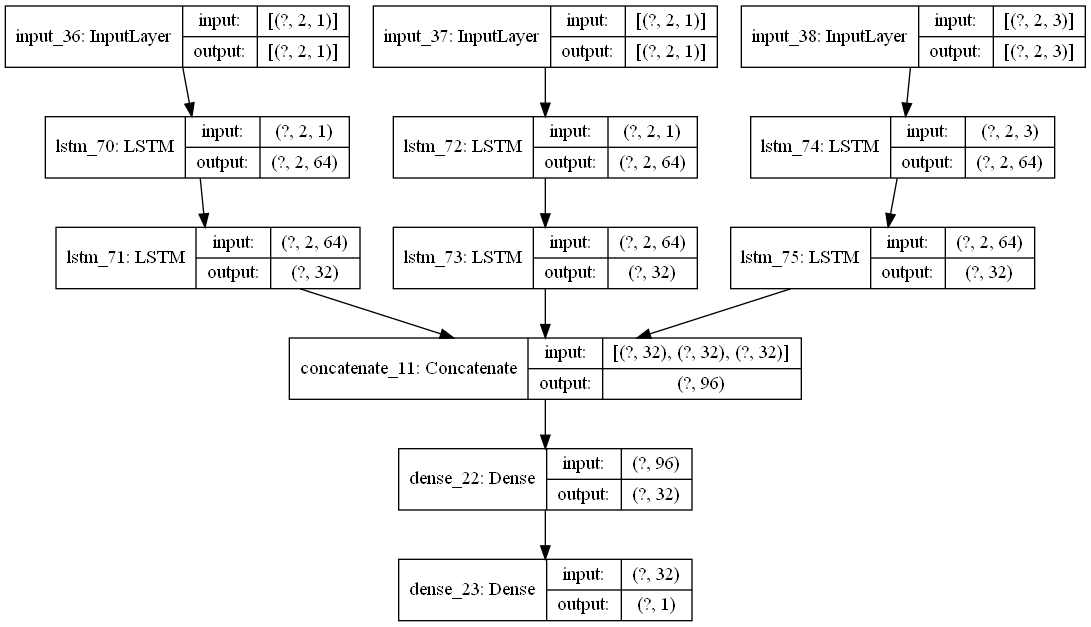

In [198]:
from keras.utils import plot_model
plot_model(model, to_file='model_20210124.png', show_shapes=True)

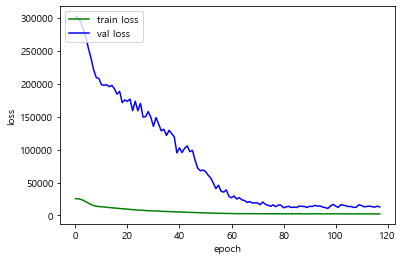

In [369]:
# 학습 시각화 함수
def learning_graph(hist):
    fig, loss_ax = plt.subplots()
    loss_ax.plot(hist.history['loss'],'g', label='train loss')
    loss_ax.plot(hist.history['val_loss'],'b', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    plt.show()
    
learning_graph(hist)

RMSE:  85.09
R-Square:  0.69


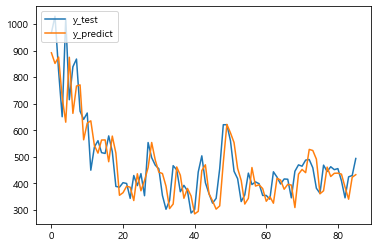

    y_test   y_predict
0      967  891.516907
1     1029  851.537598
2      824  875.462891
3      651  724.017334
4     1020  630.562195
..     ...         ...
81     410  435.202240
82     346  386.132660
83     425  340.848846
84     430  423.471283
85     494  433.098419

[86 rows x 2 columns]


In [370]:
# 실제값, 예측값 그래프
y_predict = model.predict([news_test_x, search_test_x, covid_test_x])

# 에러율 - Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_predict, covid_test_y))
print('RMSE: ',rmse.round(2))

r = explained_variance_score(covid_test_y, y_predict)
print('R-Square: ',r.round(2))

fig, loss_ax = plt.subplots()
loss_ax.plot(covid_test_y, label='y_test')
loss_ax.plot(y_predict, label='y_predict')
loss_ax.legend(loc='upper left')
plt.show()

df = pd.DataFrame(covid_test_y)
df.insert(1,'y_predict',y_predict)
df.rename(columns={0:'y_test'}, inplace=True)
print(df)